In [1]:
%matplotlib inline

import os
import yaml
import numpy as np
import matplotlib.pyplot as plt

import astropy as ap
from lenspack.image.inversion import ks93, ks93inv

In [2]:
with open('../config.yml', 'r') as file:
    config_data = yaml.safe_load(file)

KTNG_DIR = os.path.expanduser(config_data['ktng_dir'])

In [3]:
%store -r extent

In [4]:
width_ori = 1024
width = 360

In [5]:
fname = os.path.join(KTNG_DIR, "run001", "kappa23.dat")
with open(fname, 'rb') as f:
    dummy = np.fromfile(f, dtype="int32", count=1)
    kappa = np.fromfile(f, dtype="float", count=width_ori*width_ori)
    dummy = np.fromfile(f, dtype="int32", count=1)
kappa = kappa.reshape((width_ori, width_ori))
kappa = kappa[:width, :width]
vmin = np.min(kappa)
vmax = np.max(kappa)

In [6]:
bmode = np.zeros((width, width)) # no B-mode (convergence maps are real-valued)
gamma1, gamma2 = ks93inv(kappa, bmode)
vmax_gamma = max(
    np.max(gamma1), np.max(gamma2),
    -np.min(gamma1), -np.min(gamma2)
)
gamma = gamma1 + 1j * gamma2

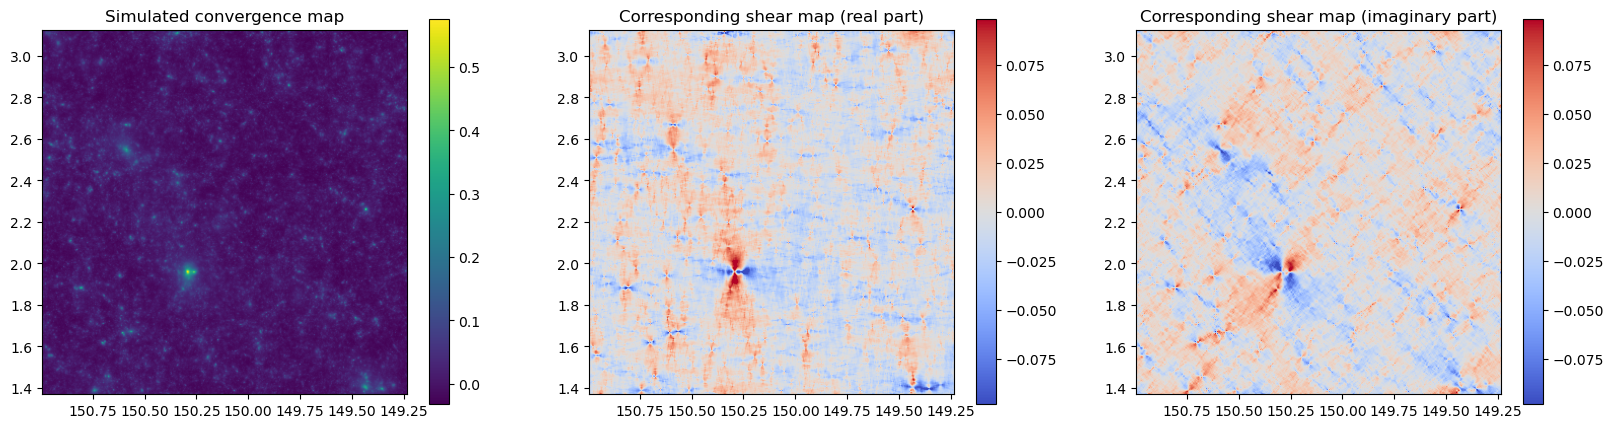

In [7]:
saturation = 0.6

plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.imshow(kappa, origin='lower', vmin=vmin, vmax=vmax, extent=extent)
plt.xlim(plt.gca().get_xlim()[::-1]) # Flip x-axis
plt.colorbar()
plt.title("Simulated convergence map")

plt.subplot(132)
plt.imshow(
    gamma1, cmap='coolwarm', origin='lower',
    vmin=-saturation*vmax_gamma, vmax=saturation*vmax_gamma, extent=extent
)
plt.xlim(plt.gca().get_xlim()[::-1]) # Flip x-axis
plt.colorbar()
plt.title("Corresponding shear map (real part)")

plt.subplot(133)
plt.imshow(
    gamma2, cmap='coolwarm', origin='lower',
    vmin=-saturation*vmax_gamma, vmax=saturation*vmax_gamma, extent=extent
)
plt.xlim(plt.gca().get_xlim()[::-1]) # Flip x-axis
plt.colorbar()
plt.title("Corresponding shear map (imaginary part)")

plt.show()

In [8]:
kappa_norm = kappa - np.mean(kappa)
vmin_norm = np.min(kappa_norm)
vmax_norm = np.max(kappa_norm)

In [9]:
gamma1_norm, gamma2_norm = ks93inv(kappa_norm, bmode)
vmax_gamma_norm = max(
    np.max(gamma1_norm), np.max(gamma2_norm),
    -np.min(gamma1_norm), -np.min(gamma2_norm)
)
gamma_norm = gamma1_norm + 1j * gamma2_norm

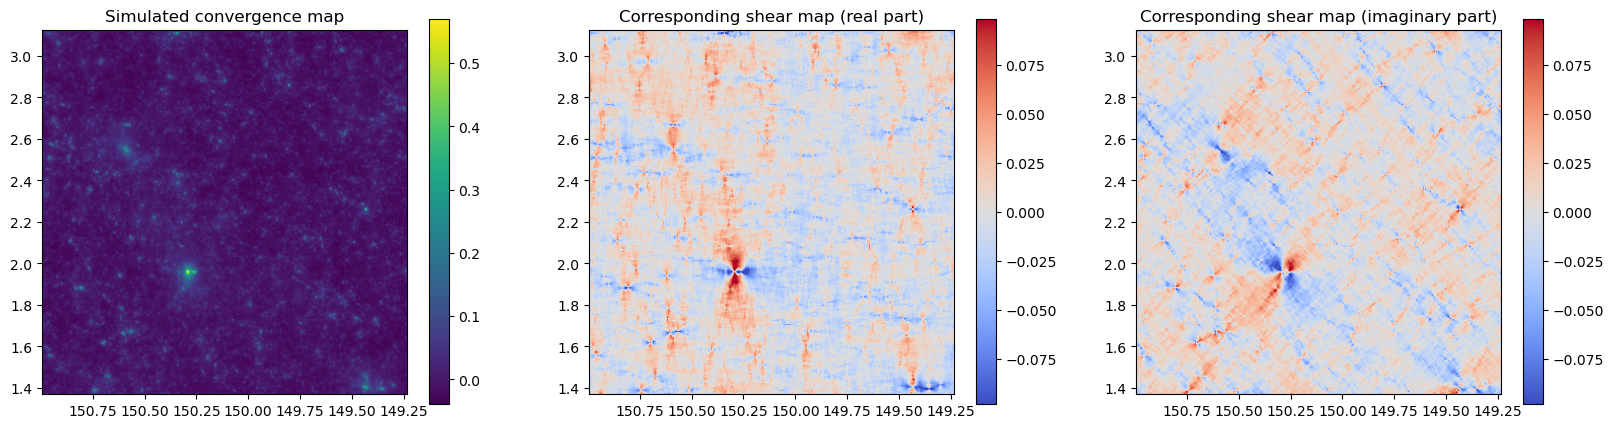

In [10]:
saturation = 0.6

plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.imshow(kappa_norm, origin='lower', vmin=vmin_norm, vmax=vmax_norm, extent=extent)
plt.xlim(plt.gca().get_xlim()[::-1]) # Flip x-axis
plt.colorbar()
plt.title("Simulated convergence map")

plt.subplot(132)
plt.imshow(
    gamma1_norm, cmap='coolwarm', origin='lower',
    vmin=-saturation*vmax_gamma_norm, vmax=saturation*vmax_gamma_norm, extent=extent
)
plt.xlim(plt.gca().get_xlim()[::-1]) # Flip x-axis
plt.colorbar()
plt.title("Corresponding shear map (real part)")

plt.subplot(133)
plt.imshow(
    gamma2_norm, cmap='coolwarm', origin='lower',
    vmin=-saturation*vmax_gamma_norm, vmax=saturation*vmax_gamma_norm, extent=extent
)
plt.xlim(plt.gca().get_xlim()[::-1]) # Flip x-axis
plt.colorbar()
plt.title("Corresponding shear map (imaginary part)")

plt.show()

In [11]:
print(f"Mean value of the convergence map = {np.mean(kappa):.1e}")
print(f"Mean value of the normalized convergence map = {np.mean(kappa_norm):.1e}")
print(
    f"Mean value of the shear map computed on the convergence map = {np.mean(gamma):.1e}"
)
print(
    f"Mean value of the shear map computed on the normalized convergence map = {np.mean(gamma_norm):.1e}"
)
print(
    f"Normalized norm of diffs = {np.linalg.norm(gamma_norm - gamma) / np.linalg.norm(gamma):.1e}"
)

Mean value of the convergence map = 6.4e-03
Mean value of the normalized convergence map = 1.2e-18
Mean value of the shear map computed on the convergence map = 2.7e-20+7.7e-21j
Mean value of the shear map computed on the normalized convergence map = 2.7e-19-2.0e-20j
Normalized norm of diffs = 2.2e-16


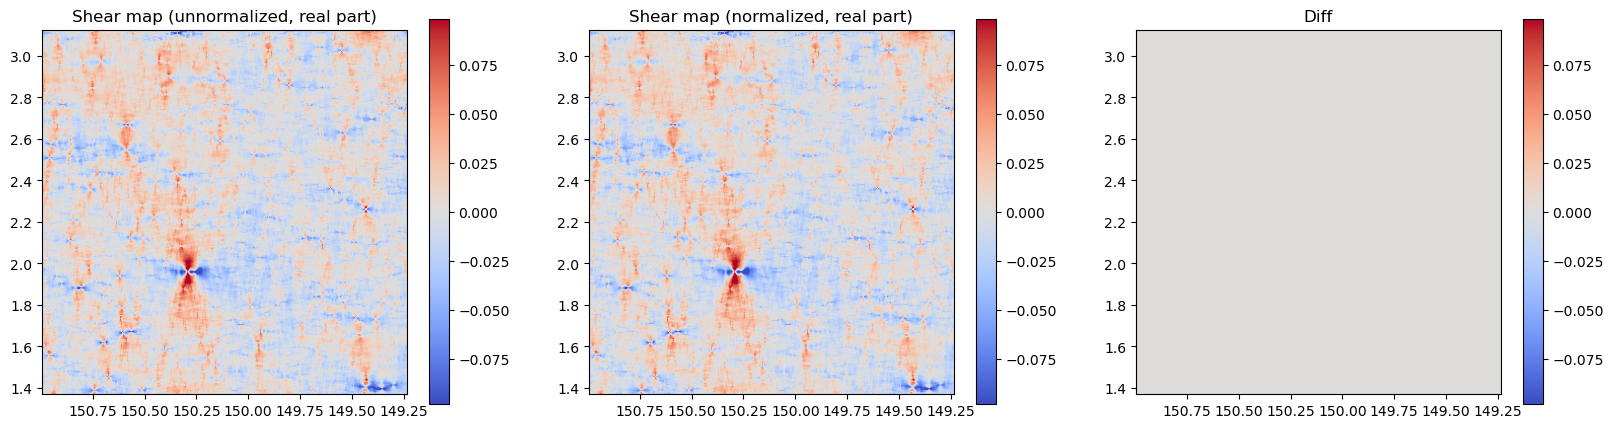

In [12]:
plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.imshow(
    gamma1, cmap='coolwarm', origin='lower',
    vmin=-saturation*vmax_gamma_norm, vmax=saturation*vmax_gamma_norm, extent=extent
)
plt.xlim(plt.gca().get_xlim()[::-1]) # Flip x-axis
plt.colorbar()
plt.title("Shear map (unnormalized, real part)")

plt.subplot(132)
plt.imshow(
    gamma1_norm, cmap='coolwarm', origin='lower',
    vmin=-saturation*vmax_gamma_norm, vmax=saturation*vmax_gamma_norm, extent=extent
)
plt.xlim(plt.gca().get_xlim()[::-1]) # Flip x-axis
plt.colorbar()
plt.title("Shear map (normalized, real part)")

plt.subplot(133)
plt.imshow(
    gamma1 - gamma1_norm, cmap='coolwarm', origin='lower',
    vmin=-saturation*vmax_gamma_norm, vmax=saturation*vmax_gamma_norm, extent=extent
)
plt.xlim(plt.gca().get_xlim()[::-1]) # Flip x-axis
plt.colorbar()
plt.title("Diff")

plt.show()

In [13]:
bias1 = np.random.normal(0.1, 0.05)
bias2 = np.random.normal(0.1, 0.05)

gamma1_bias = gamma1 + bias1
gamma2_bias = gamma2 + bias2
gamma_bias = gamma1_bias + 1j * gamma2_bias

In [14]:
kappa_ks, bmode_ks = ks93(gamma1, gamma2)
kappa_ks_bias, bmode_ks_bias = ks93(gamma1_bias, gamma2_bias)

In [15]:
print(f"Mean value of the shear map = {np.mean(gamma):.1e}")
print(f"Mean value of the biased shear map = {np.mean(gamma_bias):.1e}")

print(
    f"Normalized norm of diffs (KS convergence maps) = ",
    f"{np.linalg.norm(kappa_ks_bias - kappa_ks) / np.linalg.norm(kappa_ks):.1e}"
)

print(f"Norm of B-mode (unbiased shear map) = {np.linalg.norm(bmode_ks):.1e}")
print(f"Norm of B-mode (biased shear map) = {np.linalg.norm(bmode_ks_bias):.1e}")

Mean value of the shear map = 2.7e-20+7.7e-21j
Mean value of the biased shear map = 1.6e-02+1.4e-01j
Normalized norm of diffs (KS convergence maps) =  7.6e-16
Norm of B-mode (unbiased shear map) = 2.2e-15
Norm of B-mode (biased shear map) = 7.3e-15


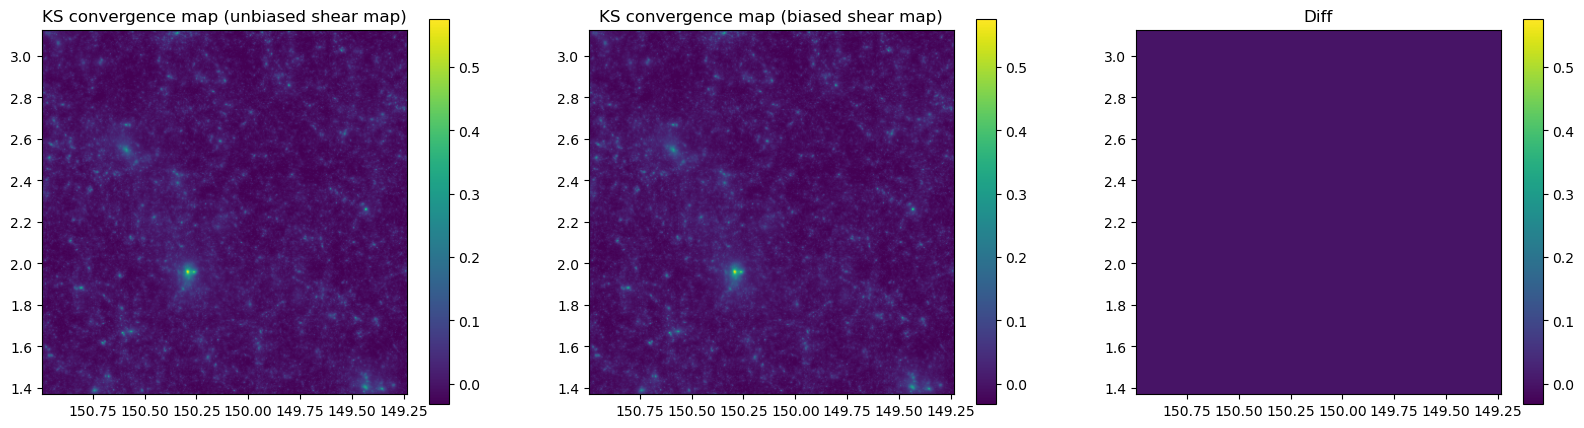

In [16]:
plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.imshow(
    kappa_ks, origin='lower',
    vmin=vmin, vmax=vmax, extent=extent
)
plt.xlim(plt.gca().get_xlim()[::-1]) # Flip x-axis
plt.colorbar()
plt.title("KS convergence map (unbiased shear map)")

plt.subplot(132)
plt.imshow(
    kappa_ks_bias, origin='lower',
    vmin=vmin, vmax=vmax, extent=extent
)
plt.xlim(plt.gca().get_xlim()[::-1]) # Flip x-axis
plt.colorbar()
plt.title("KS convergence map (biased shear map)")

plt.subplot(133)
plt.imshow(
    kappa_ks_bias - kappa_ks, origin='lower',
    vmin=vmin, vmax=vmax, extent=extent
)
plt.xlim(plt.gca().get_xlim()[::-1]) # Flip x-axis
plt.colorbar()
plt.title("Diff")

plt.show()